# Compare a time series generated by TPXO7.2 using SLIM software to a time series generated by FES2014 using own code

*Author: Miriam Sterl*

We check the tidal currents $U$, $V$ at 50N, 25W (North Atlantic), starting on 2002-01-01 for 1 month.

A test series generated by TPXO7.2 using SLIM software is provided, which uses 13 different tidal constituents. The time series generated here using FES2014 only takes into account the M$_2$, S$_2$, K$_1$ and O$_1$ tidal constituents.

In [1]:
import numpy as np
import math
import datetime
from datetime import timedelta
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

## The time series generated by TPXO7.2

In [2]:
f = open("tidal_series.txt", "r")
data = f.readlines()

t_TPXO = np.zeros(len(data))
U_TPXO = np.zeros(len(data))
V_TPXO = np.zeros(len(data))
i=0
for line in data:
    words = line.split()
    t_TPXO[i] = float(words[0])
    U_TPXO[i] = float(words[2])
    V_TPXO[i] = float(words[3])
    i+=1

In [3]:
runtime = t_TPXO[-1] - t_TPXO[0] # total time
diff = t_TPXO[1] - t_TPXO[0] # time step
# time is in seconds since 1970-01-01, so the first date is 2002-01-01:
starttime = datetime.datetime(1970,1,1,0,0) + datetime.timedelta(seconds=t_TPXO[0])
print(starttime)
endtime = datetime.datetime(1970,1,1,0,0) + datetime.timedelta(seconds=t_TPXO[-1])
print(endtime)

2002-01-01 00:00:00
2002-02-01 00:00:00


In [4]:
# We want to measure time in number of days since 2002-01-01 00:00:00:
t_TPXO = t_TPXO/86400.
trel = t_TPXO[0]
for i in range(len(t_TPXO)):
    t_TPXO[i]=t_TPXO[i]-trel

## Generating the time series with FES2014

In [5]:
FileM2_U = '/science/projects/oceanparcels/input_data/DataPlasticTides/FES/eastward_velocity/m2.nc'
FileS2_U = '/science/projects/oceanparcels/input_data/DataPlasticTides/FES/eastward_velocity/s2.nc'
FileK1_U = '/science/projects/oceanparcels/input_data/DataPlasticTides/FES/eastward_velocity/k1.nc'
FileO1_U = '/science/projects/oceanparcels/input_data/DataPlasticTides/FES/eastward_velocity/o1.nc'
FileM2_V = '/science/projects/oceanparcels/input_data/DataPlasticTides/FES/northward_velocity/m2.nc'
FileS2_V = '/science/projects/oceanparcels/input_data/DataPlasticTides/FES/northward_velocity/s2.nc'
FileK1_V = '/science/projects/oceanparcels/input_data/DataPlasticTides/FES/northward_velocity/k1.nc'
FileO1_V = '/science/projects/oceanparcels/input_data/DataPlasticTides/FES/northward_velocity/o1.nc'
datasetM2_U = Dataset(FileM2_U)
datasetS2_U = Dataset(FileS2_U)
datasetK1_U = Dataset(FileK1_U)
datasetO1_U = Dataset(FileO1_U)
datasetM2_V = Dataset(FileM2_V)
datasetS2_V = Dataset(FileS2_V)
datasetK1_V = Dataset(FileK1_V)
datasetO1_V = Dataset(FileO1_V)

Ua_M2 = datasetM2_U.variables['Ua'][:] 
Ug_M2 = datasetM2_U.variables['Ug'][:] 
latU_M2 = datasetM2_U.variables['lat'][:]
lonU_M2 = datasetM2_U.variables['lon'][:]

Ua_S2 = datasetS2_U.variables['Ua'][:] 
Ug_S2 = datasetS2_U.variables['Ug'][:] 
latU_S2 = datasetS2_U.variables['lat'][:]
lonU_S2 = datasetS2_U.variables['lon'][:]

Ua_K1 = datasetK1_U.variables['Ua'][:] 
Ug_K1 = datasetK1_U.variables['Ug'][:] 
latU_K1 = datasetK1_U.variables['lat'][:]
lonU_K1 = datasetK1_U.variables['lon'][:]

Ua_O1 = datasetO1_U.variables['Ua'][:] 
Ug_O1 = datasetO1_U.variables['Ug'][:] 
latU_O1 = datasetO1_U.variables['lat'][:]
lonU_O1 = datasetO1_U.variables['lon'][:]

Va_M2 = datasetM2_V.variables['Va'][:] 
Vg_M2 = datasetM2_V.variables['Vg'][:] 
latV_M2 = datasetM2_V.variables['lat'][:]
lonV_M2 = datasetM2_V.variables['lon'][:]

Va_S2 = datasetS2_V.variables['Va'][:] 
Vg_S2 = datasetS2_V.variables['Vg'][:] 
latV_S2 = datasetS2_V.variables['lat'][:]
lonV_S2 = datasetS2_V.variables['lon'][:]

Va_K1 = datasetK1_V.variables['Va'][:] 
Vg_K1 = datasetK1_V.variables['Vg'][:] 
latV_K1 = datasetK1_V.variables['lat'][:]
lonV_K1 = datasetK1_V.variables['lon'][:]

Va_O1 = datasetO1_V.variables['Va'][:] 
Vg_O1 = datasetO1_V.variables['Vg'][:] 
latV_O1 = datasetO1_V.variables['lat'][:]
lonV_O1 = datasetO1_V.variables['lon'][:]

deg2rad = np.pi/180 # factor to convert degrees to radians

In [6]:
omega_M2 = 28.9841042 * deg2rad / 3600.0 # angular frequency of M2 in rad/s
omega_S2 = 30.0000000 * deg2rad / 3600.0 # angular frequency of S2 in rad/s
omega_K1 = 15.0410686 * deg2rad / 3600.0 # angular frequency of K1 in rad/s
omega_O1 = 13.9430356 * deg2rad / 3600.0 # angular frequency of O1 in rad/s

Calculations of the tidal currents below are based on Doodson (1921) and Schureman (1958).

In [7]:
# Define constants to compute astronomical variables T, h, s, N (all in degrees)
cT0 = 180.0; cT1 = 360.0 * 36525
ch0 = 280.1895; ch1 = 36000.7689
cs0 = 277.0248; cs1 = 481267.8906
cN0 = 259.1568; cN1 = -1934.1420
# origin of time = 1 January 1900, 00:00:00 UTC
t0 = datetime.datetime(1900,1,1,0,0) 
t0rel = (starttime - t0).total_seconds()

def julian_centuries(time):
    """
    Calculates the number of Julian centuries (36525 days) that have passed between 
    t0 = 1 January 1900, 00:00:00 UTC and a certain time
    :param time: date and time as datetime.datetime object
    """
    diff = time - t0
    return diff.days/36525.0

def astronomical_variables(time):
    """
    Calculates the values of the astronomical variables T, h, s, N, I, nu, xi at a certain time
    :param time: date and time as datetime.datetime object
    """
    deg2rad = np.pi/180 # factor to convert degrees to radians
    t = julian_centuries(time)
    
    # T = mean solar angle
    T = ((cT0 + cT1*t)%360) * deg2rad
    
    # h = solar longitude
    h = ((ch0 + ch1*t)%360) * deg2rad
    
    # s = lunar longitude
    s = ((cs0 + cs1*t)%360) * deg2rad
    
    # N = longitude of moon's ascending node
    N = ((cN0 + cN1*t)%360) * deg2rad
    
    # I, nu, xi
    I = math.acos(0.91370 - 0.03569*math.cos(N))
    tanN = math.tan(0.5*N)
    at1 = math.atan(1.01883 * tanN)
    at2 = math.atan(0.64412 * tanN)
    nu = at1 - at2
    xi = -at1 - at2 + N
    nuprim = math.atan(math.sin(2*I) * math.sin(nu)/(math.sin(2*I)*math.cos(nu) + 0.3347))
    
    return T, h, s, N, I, nu, xi, nuprim

# Calculate V(t0)
T0, h0, s0, N0, I0, nu0, xi0, nuprim0 = astronomical_variables(t0)
V_M2 = 2*T0 + 2*h0 - 2*s0
V_S2 = 2*T0
V_K1 = T0 + h0 - 0.5*math.pi
V_O1 = T0 + h0 - 2*s0 + 0.5*math.pi

def TidalCurrentU(time):
    date = starttime + datetime.timedelta(seconds=time) # current date and time
    T, h, s, N, I, nu, xi, nuprim = astronomical_variables(date)
    u_M2 = 2*xi - 2*nu
    f_M2 = (math.cos(0.5*I))**4/0.9154
    u_S2 = 0
    f_S2 = 1
    u_K1 = -nuprim
    f_K1 = math.sqrt(0.8965*(math.sin(2*I))**2 + 0.6001*math.sin(2*I)*math.cos(nu) + 0.1006)
    u_O1 = 2*xi - nu
    f_O1 = math.sin(I)*(math.cos(0.5*I))**2/0.3800
    ampM2 = Ua_M2[latU_M2 == 50.0, lonU_M2 == 335.0][0]*1e-2
    phaM2 = Ug_M2[latU_M2 == 50.0, lonU_M2 == 335.0][0]*deg2rad
    ampS2 = Ua_S2[latU_S2 == 50.0, lonU_S2 == 335.0][0]*1e-2
    phaS2 = Ug_S2[latU_S2 == 50.0, lonU_S2 == 335.0][0]*deg2rad
    ampK1 = Ua_K1[latU_K1 == 50.0, lonU_K1 == 335.0][0]*1e-2
    phaK1 = Ug_K1[latU_K1 == 50.0, lonU_K1 == 335.0][0]*deg2rad
    ampO1 = Ua_O1[latU_O1 == 50.0, lonU_O1 == 335.0][0]*1e-2
    phaO1 = Ug_O1[latU_O1 == 50.0, lonU_O1 == 335.0][0]*deg2rad
    
    Uvel_M2 = f_M2 * ampM2 * math.cos(omega_M2 * (time + t0rel) + V_M2 + u_M2 - phaM2)
    Uvel_S2 = f_S2 * ampS2 * math.cos(omega_S2 * (time + t0rel) + V_S2 + u_S2 - phaS2)
    Uvel_K1 = f_K1 * ampK1 * math.cos(omega_K1 * (time + t0rel) + V_K1 + u_K1 - phaK1)
    Uvel_O1 = f_O1 * ampO1 * math.cos(omega_O1 * (time + t0rel) + V_O1 + u_O1 - phaO1)
    Uvel = Uvel_M2 + Uvel_S2 + Uvel_K1 + Uvel_O1
    
    return Uvel

def TidalCurrentV(time):
    date = starttime + datetime.timedelta(seconds=time) # current date and time
    T, h, s, N, I, nu, xi, nuprim = astronomical_variables(date)
    u_M2 = 2*xi - 2*nu
    f_M2 = (math.cos(0.5*I))**4/0.9154
    u_S2 = 0
    f_S2 = 1
    u_K1 = -nuprim
    f_K1 = math.sqrt(0.8965*(math.sin(2*I))**2 + 0.6001*math.sin(2*I)*math.cos(nu) + 0.1006)
    u_O1 = 2*xi - nu
    f_O1 = math.sin(I)*(math.cos(0.5*I))**2/0.3800
    ampM2 = Va_M2[latV_M2 == 50.0, lonV_M2 == 335.0][0]*1e-2
    phaM2 = Vg_M2[latV_M2 == 50.0, lonV_M2 == 335.0][0]*deg2rad
    ampS2 = Va_S2[latV_S2 == 50.0, lonV_S2 == 335.0][0]*1e-2
    phaS2 = Vg_S2[latV_S2 == 50.0, lonV_S2 == 335.0][0]*deg2rad
    ampK1 = Va_K1[latV_K1 == 50.0, lonV_K1 == 335.0][0]*1e-2
    phaK1 = Vg_K1[latV_K1 == 50.0, lonV_K1 == 335.0][0]*deg2rad
    ampO1 = Va_O1[latV_O1 == 50.0, lonV_O1 == 335.0][0]*1e-2
    phaO1 = Vg_O1[latV_O1 == 50.0, lonV_O1 == 335.0][0]*deg2rad
    
    Vvel_M2 = f_M2 * ampM2 * math.cos(omega_M2 * (time + t0rel) + V_M2 + u_M2 - phaM2)
    Vvel_S2 = f_S2 * ampS2 * math.cos(omega_S2 * (time + t0rel) + V_S2 + u_S2 - phaS2)
    Vvel_K1 = f_K1 * ampK1 * math.cos(omega_K1 * (time + t0rel) + V_K1 + u_K1 - phaK1)
    Vvel_O1 = f_O1 * ampO1 * math.cos(omega_O1 * (time + t0rel) + V_O1 + u_O1 - phaO1)
    Vvel = Vvel_M2 + Vvel_S2 + Vvel_K1 + Vvel_O1
    
    return Vvel

In [8]:
t_FES = np.arange(0, runtime+diff, diff) # times at 900-sec-intervals (same as TPXO data)
U_FES = np.zeros(len(t_FES))
V_FES = np.zeros(len(t_FES))

for i in range(len(t_FES)):
    U_FES[i] = TidalCurrentU(t_FES[i])

for i in range(len(t_FES)):
    V_FES[i] = TidalCurrentV(t_FES[i])
    
t_FES = t_FES/86400.0

## Figures

/home/students/5664187/miniconda2/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


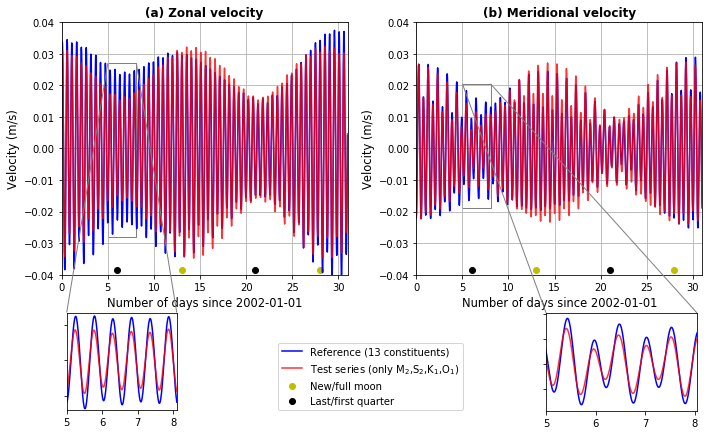

In [9]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4.5))

line11, = ax1.plot(t_TPXO,U_TPXO, 'b', label='Reference (13 components)')
line12, = ax1.plot(t_FES,U_FES, 'r', alpha=0.8, label='Test series (only '+ r'$M_2+S_2$,K$_1$,O$_1$' +')')
ax1.scatter([13,28],[-0.0385,-0.0385], c='y', marker = 'o', label='New/full moon')
ax1.scatter([6,21],[-0.0385,-0.0385], c='black', marker = 'o', label='Last/first quarter')
ax1.set_xlabel('Number of days since 2002-01-01', fontsize=11.5)
ax1.set_ylabel('Velocity (m/s)', fontsize=11.5)
ax1.set_title('(a) Zonal velocity', fontsize=12, fontweight='bold')
ax1.set_xlim(left=0, right=31)
ax1.set_ylim(bottom=-0.04,top=0.04)
ax1.grid(True)
axins1 = zoomed_inset_axes(ax1, 3.85, loc=2)
line11, = axins1.plot(t_TPXO, U_TPXO, 'b')
line12, = axins1.plot(t_FES, U_FES, 'r', alpha=0.8)
axins1.set_xlim(5.0,8.1)
axins1.set_ylim(-0.028,0.027)
axins1.set_aspect(50.0)
plt.xticks([5.0,6.0,7.0,8.0])
plt.yticks(visible=False)
mark_inset(ax1, axins1, loc1=1, loc2=2, fc="none", ec="0.5")

line11, = ax2.plot(t_TPXO,V_TPXO, 'b', label='Reference (13 constituents)')
line12, = ax2.plot(t_FES,V_FES, 'r', alpha=0.8, label='Test series (only '+ r'M$_2$,S$_2$,K$_1$,O$_1$' +')')
ax2.scatter([13,28],[-0.0385,-0.0385], c='y', marker = 'o', label='New/full moon')
ax2.scatter([6,21],[-0.0385,-0.0385], c='black', marker = 'o', label='Last/first quarter')
ax2.set_xlabel('Number of days since 2002-01-01', fontsize=11.5)
ax2.set_ylabel('Velocity (m/s)', fontsize=11.5)
ax2.set_title('(b) Meridional velocity', fontsize=12, fontweight='bold')
ax2.set_xlim(left=0, right=31)
ax2.set_ylim(bottom=-0.04,top=0.04)
ax2.grid(True)
axins2 = zoomed_inset_axes(ax2, 5.37, loc=1)
line11, = axins2.plot(t_TPXO, V_TPXO, 'b')
line12, = axins2.plot(t_FES, V_FES, 'r', alpha=0.8)
axins2.set_xlim(5.0,8.05)
axins2.set_ylim(-0.019,0.0205)
axins2.set_aspect(50.0)
plt.xticks([5.0,6.0,7.0,8.0])
plt.yticks(visible=False)
mark_inset(ax2, axins2, loc1=1, loc2=2, fc="none", ec="0.5")

handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(0.65,0.3))
plt.tight_layout()
#plt.savefig('TimeSeriesTest.pdf', bbox_inches='tight')

## Relative error

To estimate the relative error, we compute the ratio of the mean absolute difference in velocity for both time series and the maximum velocity value of our own test series.

In [10]:
differenceU = abs(U_TPXO - U_FES)
fractionU = np.mean(differenceU)/np.max(U_FES)
print(fractionU)

0.1104044575430799


In [11]:
differenceV = abs(V_TPXO - V_FES)
fractionV = np.mean(differenceV)/np.max(V_FES)
print(fractionV)

0.07384895334032934
